In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!gdown --id 1QU_7IUsfpz19rx5Ud3efCE-rFdBgSEND

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QU_7IUsfpz19rx5Ud3efCE-rFdBgSEND
To: /content/sehirler - sehirler_saglikli.csv
100% 3.60k/3.60k [00:00<00:00, 4.34MB/s]


In [3]:
saglikk = pd.read_csv("sehirler - sehirler_saglikli.csv")

In [4]:
X = saglikk[["Obesity levels(Country)","Pollution(Index score) (City)","Annual avg. hours worked","Happiness levels(Country)","Pollution(Index score) (City)",]]
y = saglikk[["Life expectancy(years) (Country)"]]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

In [6]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.1,random_state=1)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)



(31, 5)
(16, 5)
(4, 5)
(31, 1)
(16, 1)
(4, 1)


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_validation = sc.transform(x_validation)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()
model.add(Dense(15, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [12]:
opt = Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.979)
model.compile(loss='mean_squared_error', optimizer=opt)

In [13]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=25, verbose=1, mode='auto', restore_best_weights=True)

In [14]:
history = model.fit(x_train,y_train,validation_data=(x_validation,y_validation),callbacks=[monitor], verbose=0, epochs=4000)

Restoring model weights from the end of the best epoch: 229.
Epoch 254: early stopping


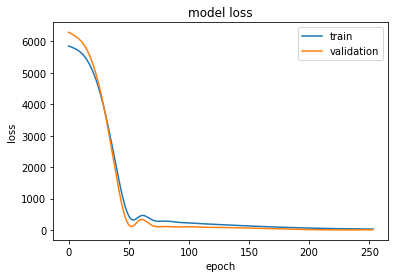

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

In [16]:
tahminler = model.predict(x_test)
from sklearn import metrics
HataDegeri = metrics.mean_squared_error(y_test.values.reshape(-1,), tahminler.reshape(-1,))
print("ortalama kare hatası:" , HataDegeri)

ortalama kare hatası: 43.39410356240485


In [17]:
model.save("network.h5")

In [18]:
from tensorflow.keras.models import load_model
model2 = load_model("network.h5")
tahminler = model2.predict(x_test)
from sklearn import metrics
HataDegeri = metrics.mean_squared_error(y_test.values.reshape(-1,), tahminler.reshape(-1,))
print("ortalama kare hatası:" , HataDegeri)

ortalama kare hatası: 43.39410356240485
